# Trees and Forests

### Step 1: Import Modules

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score

### Step 2: Load the Breast Cancer Dataset

In [38]:
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df["target"] = data.target

### Step 3: Split the data into training and testing sets

In [39]:
X = df.drop(columns=["target"])
y = df["target"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

### Step 4: Display the first five rows

In [40]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


### Step 5: DecisionTreeClassifier to fit a model on training data

In [41]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


### Step 6: Visualize the resulting tree using plot_tree

[Text(0.5694444444444444, 0.9, 'x[20] <= 16.795\ngini = 0.468\nsamples = 455\nvalue = [170, 285]'),
 Text(0.3055555555555556, 0.7, 'x[27] <= 0.136\ngini = 0.162\nsamples = 304\nvalue = [27, 277]'),
 Text(0.4375, 0.8, 'True  '),
 Text(0.1111111111111111, 0.5, 'x[28] <= 0.157\ngini = 0.036\nsamples = 271\nvalue = [5, 266]'),
 Text(0.05555555555555555, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.16666666666666666, 0.3, 'x[13] <= 38.605\ngini = 0.029\nsamples = 270\nvalue = [4, 266]'),
 Text(0.1111111111111111, 0.1, '\n  (...)  \n'),
 Text(0.2222222222222222, 0.1, '\n  (...)  \n'),
 Text(0.5, 0.5, 'x[21] <= 25.62\ngini = 0.444\nsamples = 33\nvalue = [22, 11]'),
 Text(0.3888888888888889, 0.3, 'x[7] <= 0.08\ngini = 0.375\nsamples = 12\nvalue = [3, 9]'),
 Text(0.3333333333333333, 0.1, '\n  (...)  \n'),
 Text(0.4444444444444444, 0.1, '\n  (...)  \n'),
 Text(0.6111111111111112, 0.3, 'x[28] <= 0.268\ngini = 0.172\nsamples = 21\nvalue = [19, 2]'),
 Text(0.5555555555555556, 0.1, '\n  

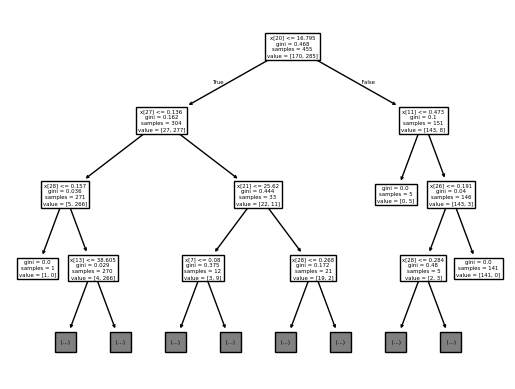

In [42]:
plot_tree(tree_model)
plot_tree(tree_model, max_depth=3)

plt.figure(figsize=(14, 10))
plot_tree(
    tree_clf,
    feature_names=data.feature_names,
    class_names=list(data.target_names),
    filled=False,
    impurity=True,
    rounded=True,
    max_depth=3,  # limit view so the plot is readable
)
plt.title("Decision Tree (view truncated at depth=3)")
plt.show()

### Step 7: Train the random forest model

In [43]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


### Step 8: Extract the feature importances

In [44]:
importances = rf_model.feature_importances_
features = X_train.columns

### Step 9: Print feature importance

In [45]:
importances_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importances_df.sort_values(by='Importance', ascending=False, inplace=True)
print(importances_df)

                    Feature  Importance
22          worst perimeter    0.136027
20             worst radius    0.122491
7       mean concave points    0.120011
23               worst area    0.108592
27     worst concave points    0.095306
3                 mean area    0.067536
6            mean concavity    0.044851
26          worst concavity    0.043892
2            mean perimeter    0.034486
13               area error    0.028988
0               mean radius    0.025869
12          perimeter error    0.019623
10             radius error    0.019378
25        worst compactness    0.018845
21            worst texture    0.017788
28           worst symmetry    0.012194
1              mean texture    0.011220
5          mean compactness    0.009218
16          concavity error    0.008704
11            texture error    0.007023
24         worst smoothness    0.006719
29  worst fractal dimension    0.006515
19  fractal dimension error    0.005871
8             mean symmetry    0.004806


### Step 10: Build and train an AdaBoostClassifier on your training data

In [46]:
ab_model = AdaBoostClassifier() # default arguments set a DT with max depth of 1 as estimator
ab_model.fit(X_train, y_train)

,estimator,None
,n_estimators,50
,learning_rate,1.0
,algorithm,'deprecated'
,random_state,None


### Step 11: Evaluate the models

In [47]:
print(f'Decision Tree Accuracy: {tree_model.score(X_test, y_test)}')
print(f'Random Forest Accuracy: {rf_model.score(X_test, y_test)}')
print(f'AdaBoost Accuracy: {ab_model.score(X_test, y_test)}')

Decision Tree Accuracy: 0.9035087719298246
Random Forest Accuracy: 0.956140350877193
AdaBoost Accuracy: 0.956140350877193
